# Machine Learning Engineer Nanodegree
## Capstone Proposal
Miguel Ángel Martínez Fernández

April 6, 2018

## I. Definition

### Project Overview
In this project, it will be analysed a dataset containing data on NBA Players game stats from 1980 to 2017. One goal of this project is to find the set of features that best describes a player position.

The original dataset for this project has been taken from this repository at [Kaggle](https://www.kaggle.com/drgilermo/nba-players-stats/data), which in turn has scrapped it from [Basketball-reference](https://www.basketball-reference.com).

A model will be trained to predict player positions based on their stats for that set of features. This model could be used by NBA trainers to rethink his players’ position having into consideration their last year stats. Some players, when they get older, move their playing position to more interior roles, to compensate the loss of velocity.

Machine learning has been previously used to make sports predictions. In the following [link](https://www.sciencedirect.com/science/article/pii/S2210832717301485), it can be found a critical survey of the literature on ML for sports result prediction, focusing on the use of neural networks (NN) for this problem.

### Problem Statement
The problem to be solved is to predict which position should be playing a NBA player based on his stats. It is usual that players as they get older, they move slower and it is needed to change their playing position to more interior roles. Being able to predict when that change is needed can save both the trainer's and the player's season!

Our problem corresponds to what is known as a [Multi-Class Classification](https://en.wikipedia.org/wiki/Multiclass_classification) problem. The model has to predict a discrete number of labels, i.e., point guard, small guard, center...

The dataset mentioned in the previous section will be used as input of an unsupervised learning algorithm which, making use of principal component analysis, will return which features best describe a player position.

The features selected by the previous algorithm will be used as input features, using the player game position as the label to train a supervised learning algorithm.

The supervised learning algorithm will be trained with only the 80% of the dataset. The remaining 20% will be used to test the model and ensure that it can successfully predict a player's position based on his benchmark. The predictions and the labels of the testing set will be compared, and the model accuracy will be calculated using the following formula:

>     def categorical_accuracy(y_true, y_pred): 
>       return K.cast(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)), K.floatx())


`categorical_accuracy` checks to see if the index of the maximal true value is equal to the index of the maximal predicted value.


In the _data exploration section_ it can be seen that the classes are balanced. That characteristic of our dataset will let us use the accuracy of the predictions to evaluate the performance of this project solution.

Whenever an NBA trainer would like to reconsider the position of any of his team players, he will only need to enter the player stats corresponding to the features previously mentioned as input to the model, and it will return the players' predicted position.

### Technical Requirements

This project has been developed in [Python 3.6.5](https://www.python.org/downloads/release/python-365/), on a [Jupyter Notebook](http://jupyter.org/), by making use of the following libraries: 
- [IPython](https://ipython.org/)
- [Keras](http://keras.io/)
- [Matplotlib](https://matplotlib.org/)
- [NumPy](http://www.numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [TensorFlow](http://tensorflow.org/)
- [scikit-learn](http://scikit-learn.org/)

For the benefit of the reader, a functional description has been added prior to each code section. Nevertheless, some basic [Python](https://www.python.org/) and [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning) is recommended for a complete understanding of the project.

## II. Analysis

### Data Exploration
As previously mentioned, the original dataset for this project has been taken from this repository at [Kaggle](https://www.kaggle.com/drgilermo/nba-players-stats/data), which in turn has scrapped it from [Basketball-reference](https://www.basketball-reference.com).

The dataset consists on 18609 samples. Each sample contains the following information:

| Field | Description                | Type    |
|-------|-----------------------------|---------|
| Year  | Season                      | Numeric |
| Age   | Age                         | Numeric |
| G     | Games                       | Numeric |
| MP    | Minutes played              | Numeric |
| FG    | Field goals                 | Numeric |
| FGA   | Field goal attempts         | Numeric |
| 3P    | 3-point field goals         | Numeric |
| 3PA   | 3-point field goal attempts | Numeric |
| 2P    | 2-point field goals         | Numeric |
| 2PA   | 2-point field goal attempts | Numeric |
| FT    | Free throws                 | Numeric |
| FTA   | Free throw attempts         | Numeric |
| ORB   | Offensive rebounds          | Numeric |
| DRB   | Defensive rebounds          | Numeric |
| TRB   | Total rebounds              | Numeric |
| AST   | Assists                     | Numeric |
| STL   | Steals                      | Numeric |
| BLK   | Blocks                      | Numeric |
| TOV   | Turnovers                   | Numeric |
| PF    | Personal fouls              | Numeric |
| PTS   | Points                      | Numeric |
| Pos   | Position                    | String  |

Please notice that the last column (`Pos`, the player's position) corresponds to the feature we would like our model to predict based on the values of the other features. 

In the table below it can be seen the different values that the `Pos` feature can contain, its description, and the number of samples per value.

| Value | Description    | # samples |
|-------|----------------|-----------|
| C     | Center         | 3737      |
| PF    | Power forward  | 3919      |
| PG    | Poing guard    | 3737      |
| SF    | Small forward  | 3547      |
| SG    | Shooting guard | 3669      |

For your reference I have copied below the first eleven records of the dataset in both plain text and table formats:

Sample data in plain text:
>Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos
>1980,32,82,3143,835,1383,0,1,835,1382,364,476,190,696,886,371,81,280,297,216,2034,C
>1980,25,67,1222,153,318,0,1,153,317,56,82,62,129,191,87,35,12,39,118,362,PF
>1980,25,75,2168,465,875,0,2,465,873,188,236,158,451,609,322,108,55,218,237,1118,C
>1980,31,80,2864,383,794,4,18,379,776,361,435,59,138,197,671,106,10,242,218,1131,PG
>1980,31,26,560,27,60,0,0,27,60,32,50,29,86,115,40,12,15,27,66,86,C
>1980,28,20,180,16,35,1,1,15,34,5,13,6,22,28,26,7,4,11,18,38,SG
>1980,22,67,726,122,271,0,0,122,271,68,101,71,126,197,28,21,54,79,116,312,PF
>1980,25,82,2438,545,1101,16,47,529,1054,171,227,240,398,638,159,90,36,133,197,1277,SF
>1980,28,77,2330,384,760,1,3,383,757,139,209,192,264,456,279,85,49,189,268,908,SF
>1980,27,20,287,24,60,0,0,24,60,16,32,34,43,77,18,5,12,18,52,64,PF

Same sample data in table format:

| Year | Age | G  | MP   | FG   | FGA  | 3P | 3PA | 2P  | 2PA  | FT  | FTA | ORB | DRB | TRB  | AST | STL | BLK | TOV | PF  | PTS  | Pos   |
|------|-----|----|------|------|------|----|-----|-----|------|-----|-----|-----|-----|------|-----|-----|-----|-----|-----|------|-------|
| 1980 | 32  | 82 | 3143 | 835  | 1383 | 0  | 1   | 835 | 1382 | 364 | 476 | 190 | 696 | 886  | 371 | 81  | 280 | 297 | 216 | 2034 | C     |
| 1980 | 25  | 67 | 1222 | 153  | 318  | 0  | 1   | 153 | 317  | 56  | 82  | 62  | 129 | 191  | 87  | 35  | 12  | 39  | 118 | 362  | PF    |
| 1980 | 25  | 75 | 2168 | 465  | 875  | 0  | 2   | 465 | 873  | 188 | 236 | 158 | 451 | 609  | 322 | 108 | 55  | 218 | 237 | 1118 | C     |
| 1980 | 31  | 80 | 2864 | 383  | 794  | 4  | 18  | 379 | 776  | 361 | 435 | 59  | 138 | 197  | 671 | 106 | 10  | 242 | 218 | 1131 | PG    |
| 1980 | 31  | 26 | 560  | 27   | 60   | 0  | 0   | 27  | 60   | 32  | 50  | 29  | 86  | 115  | 40  | 12  | 15  | 27  | 66  | 86   | C     |
| 1980 | 28  | 20 | 180  | 16   | 35   | 1  | 1   | 15  | 34   | 5   | 13  | 6   | 22  | 28   | 26  | 7   | 4   | 11  | 18  | 38   | SG    |
| 1980 | 22  | 67 | 726  | 122  | 271  | 0  | 0   | 122 | 271  | 68  | 101 | 71  | 126 | 197  | 28  | 21  | 54  | 79  | 116 | 312  | PF    |
| 1980 | 25  | 82 | 2438 | 545  | 1101 | 16 | 47  | 529 | 1054 | 171 | 227 | 240 | 398 | 638  | 159 | 90  | 36  | 133 | 197 | 1277 | SF    |
| 1980 | 28  | 77 | 2330 | 384  | 760  | 1  | 3   | 383 | 757  | 139 | 209 | 192 | 264 | 456  | 279 | 85  | 49  | 189 | 268 | 908  | SF    |
| 1980 | 27  | 20 | 287  | 24   | 60   | 0  | 0   | 24  | 60   | 16  | 32  | 34  | 43  | 77   | 18  | 5   | 12  | 18  | 52  | 64   | PF    |



Below, it can be observed a statistical description of the dataset:

In [19]:
# Display a description of the dataset
display(dataset.iloc[:,0:7].describe())

,Year,Age,G,MP,FG,FGA,3P
count,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000
mean,2000.208931,26.838412,49.933903,1170.126337,186.599172,404.127465,22.303348
std,10.708379,4.000733,26.551748,923.422603,181.545157,378.867873,38.655701
min,1980.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1991.000000,24.000000,26.000000,321.000000,37.000000,89.000000,0.000000
50%,2001.000000,26.000000,55.000000,996.000000,131.000000,294.000000,3.000000
75%,2010.000000,30.000000,75.000000,1906.000000,287.000000,624.000000,27.000000
max,2017.000000,44.000000,85.000000,3533.000000,1098.000000,2279.000000,402.000000


In [20]:
# Display a description of the dataset
display(dataset.iloc[:,7:14].describe())

,3PA,2P,2PA,FT,FTA,ORB,DRB
count,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000
mean,63.839271,164.295825,340.288194,94.324735,125.244183,60.674674,144.947767
std,102.679571,168.188121,335.619645,107.571363,137.384324,66.152039,142.418313
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,31.000000,71.000000,16.000000,23.000000,12.000000,33.000000
50%,12.000000,109.000000,235.000000,56.000000,78.000000,36.000000,105.000000
75%,84.000000,248.000000,513.000000,136.000000,182.000000,89.000000,211.000000
max,886.000000,1086.000000,2213.000000,833.000000,972.000000,573.000000,1007.000000


In [21]:
# Display a description of the dataset
display(dataset.iloc[:,14:].describe())

,TRB,AST,STL,BLK,TOV,PF,PTS
count,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.00000,18609.000000
mean,205.622441,111.459348,39.056747,24.396152,73.112741,109.07405,489.826428
std,202.929588,137.760783,37.890003,36.654134,66.652526,80.87030,480.208673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,47.000000,17.000000,9.000000,3.000000,18.000000,36.00000,98.000000
50%,146.000000,62.000000,29.000000,11.000000,55.000000,100.00000,341.000000
75%,297.000000,153.000000,59.000000,30.000000,111.000000,170.00000,756.000000
max,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.00000,3041.000000


### Exploratory Visualization
To get a better understanding of the dataset, I have constructed a scatter matrix of each of the features present in the data. If a feature is relevant for the dataset, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying the player's position on the court, the scatter matrix might show a correlation between that feature and another feature in the data.

Please notice that, in the picture below, both axis (horizontal and vertical) contain all the features in the dataset.

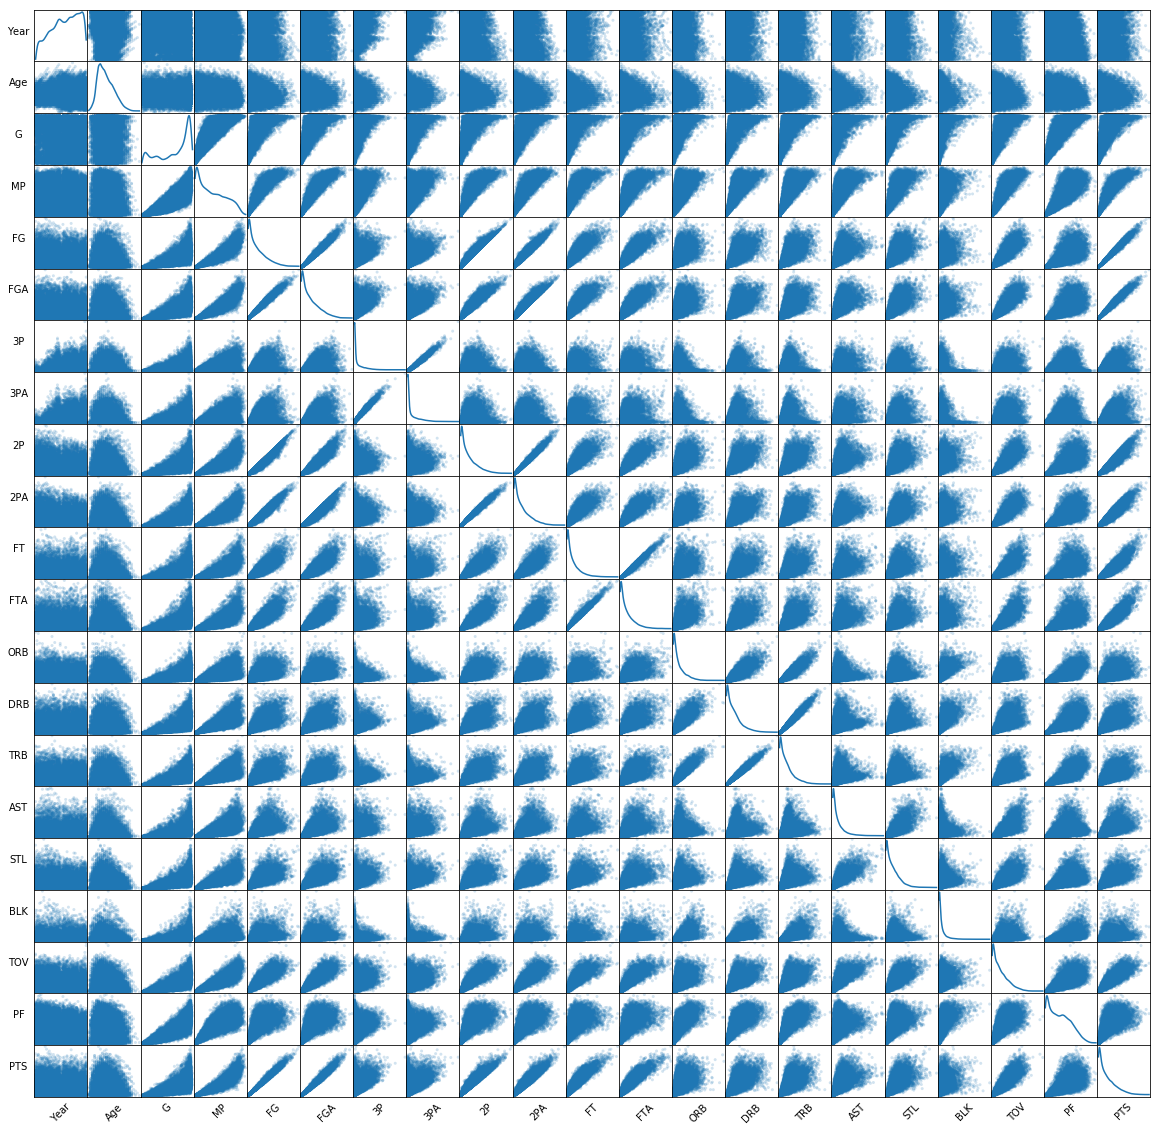

It can be observed above that some features present a huge correlation between them. For instance, both _defensive rebounds (DRB)_ and _offensive rebounds (ORB)_ correlate with _total rebounds (TRB)_. The same thing happens with some other features like _2-point field goals (2P)_ and _2-point field goal attempts (2PA)_.

_Principal Component Analysis (PCA)_ will take advantage of the correlation existing between some features in the dataset. By making use of PCA and feature reduction, we will also be lowering the impact of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

### Algorithms and Techniques
The following techniques will be applied to complete the project goal:

-	[Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning) will be used to find the set of features that best describes a player position. [Principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) will help conclude the underlying structure of the dataset. PCA uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called **principal components**. This transformation is defined in such a way that the first principal component has the largest possible variance and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. PCA is sensitive to the relative scaling of the original variables. The features that best describe a player position will be selected as the input to the supervised learning algorithm. The label will be the player position.

-	[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) will be used to train a model that predicts player positions based on their stats. A [decision tree classifier](https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567) will be trained for that purpose. A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules. The parameters of the tree will be optimized by cross-validated grid-search over a parameter grid. ShuffleSplit cross-validation technique will be used when training the model. The model performance will be validated against the testing set. The higher the accuracy is the more likely the model will be to be used by NBA trainers.

As a final bonus, the benchmark neural network model will also be trained with the new features set, to compare the performance of both neural networks, before and after having selected a subset of features using __principal component analysis__. 

Please notice that, in this project, the models will always be trained with the 80% of the dataset and tested with the remaining 20%.

In this project, I have chosed to train our solution with a _decision tree classifier_ just for illustrative purposes. Before taking this project to a production environment, I would have trained the date not only with a decision tree classifier, but also with other algorithms such as [support vector machines for multiclass classification](http://scikit-learn.org/stable/modules/svm.html#multi-class-classification), [naive bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier), and a more complex neural network than the used to benchmark the model. More information about multiclass classification can be found [here](https://en.wikipedia.org/wiki/Multiclass_classification).

### Benchmark Model
Our solution will be benchmarked against a simple neural network consisting on three fully connected dense layers.

The accuracy of the benchmark model and the new model will be compared. The objective is to discern if the combination of feature selection and hiperparameter tunning on decision trees can outperform a basic neural network approach.  

It is important to notice that all the dataset features will be used and none of them (but the labels) have been preprocessed at this moment.

The accuracy of our benchmark model is around 21%, which is almost the same than the accuracy obtained by a model which randomly selects the players position (20% is the probability of randomly selecting the correct player position between 5 possible values).

This model was selected because its probability out of the box is quite similar to the random player position selection, and, once the data has been preprocessed and a new set of features selected, it will show the correctness of our actions and decisions alongside the project.

### Evaluation Metrics
In the _data exploration_ section it can be seen that the classes are balanced. That characteristic of our dataset will let us use the accuracy of the predictions to  evaluate the performance of this project solution.

## III. Methodology

### Data Preprocessing
Some basic data preprocessing has been performed to our dataset prior to use it:

-	The number of features in the original dataset has been reduced from 52 to 22, to trying to reduce the impact of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). The fields removed from the original dataset were the name of the players and the fields that can be easily calculated by the combination of other fields (i.e., the percentage of success 2 point shots).
-	The rows with an empty value in any of the features have been removed, to have a consistent set of features. In order to select and remove these rows, [Microsoft Excel](https://products.office.com/en-US/excel) was used. This action could have been done in Python (and that would be my option chosen if the dataset was subject to change frequently or if the result of this project were going to be used in real life), but in our case, I considered that the most straightforward and cost-effective solution was to filter these rows with Excel. While performing this action in Excel, I also got a better understanding of the dataset. After removing the rows with empty value, the number of registers in our dataset decreased from 24691 to 18609.

In our dataset, the [basketball player position](https://en.wikipedia.org/wiki/Basketball_positions) can be found within column `Pos`. Please find below its possible values:


| Value | Description    |
|-------|----------------|
| C     | Center         |
| PF    | Power forward  |
| PG    | Poing guard    |
| SF    | Small forward  |
| SG    | Shooting guard |


A good representation for [categorical data](https://en.wikipedia.org/wiki/Categorical_variable) is the [one hot](https://en.wikipedia.org/wiki/One-hot) codification. The `Pos` column will be one-hot encoded to facilitate its treatment.

Please find below the value of the labels, once they have been one-hot encoded.

| Value | Description    | One-hot encoding |
|-------|----------------|------------------|
| C     | Center         | [1 0 0 0 0]      |
| PF    | Power forward  | [0 1 0 0 0]      |
| PG    | Poing guard    | [0 0 1 0 0]      |
| SF    | Small forward  | [0 0 0 1 0]      |
| SG    | Shooting guard | [0 0 0 0 1]      |




### Implementation


This project has been developed in [Python 3.6.5](https://www.python.org/downloads/release/python-365/), on a [Jupyter Notebook](http://jupyter.org/), by making use of the following libraries: 
- [IPython](https://ipython.org/)
- [Keras](http://keras.io/)
- [Matplotlib](https://matplotlib.org/)
- [NumPy](http://www.numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [TensorFlow](http://tensorflow.org/)
- [scikit-learn](http://scikit-learn.org/) 

As the first step in our project, a [__random seed__](https://en.wikipedia.org/wiki/Random_seed) will be set for both numpy and tensorflow. This is done for [reproducibility purposes](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/). This step is quite important, because random numbers are used to initiallize weights in most of the machine learning algorithms. The _random seed_  is used to initialize a pseudorandom number generator, and using always the same seed will make it possible to obtain the same random weights at each execution.

The next step will be to load the [NBA stats](https://www.kaggle.com/drgilermo/nba-players-stats/data) dataset. The _pandas read_csv_ method has been used to load the csv file containing the dataset.

The `Pos` feature (used as the label of our dataset), has been one-hot encoded using the _sklearnt LabelBinarizer_ class.

After having loaded the dataset, it will be split into [labels and features](https://stackoverflow.com/questions/40898019/what-is-the-difference-between-a-feature-and-a-label). The `Pos` column (the label to predict) will be one-hot encoded to facilitate its treatment. To split the dataset into *X_train, X_test, y_train, y_test* subsets, the _train_test_split_ method from the _sklearnt_ library has been used. 80% of the data has been allocated into the {X_train, y_train} sets and the remaining 20% into the {X_test, y_test} sets.

At that moment, a basic neural network with three fully connected dense layers will be used as the benchmark model.
This model will be trained with the 80% of the dataset and tested with the remaining 20%.

This basic neural network consists on three fully connected [_dense layers_](https://keras.io/layers/core/#dense), with [relu activation](https://keras.io/activations/#relu) in the first two layers and a [softmax activation](https://keras.io/activations/#softmax) in the last layer. [Dropout](https://keras.io/layers/core/#dropout) has not been used. The loss function is 'categorical_crossentropy' and 'Adam' has been selected as the optimizer. Ten epochs were used to train the network and a learning rate of 0.001 was used.

As mentioned before, the rationale behind selecting this network architecture and parameters is to test the dataset against a simple neural network which might be improved in the future.

It is important to notice that all the dataset features will be used and none of them (but the labels) have been preprocessed at this moment.

The accuracy of our benchmark model is around 21%.

With the intention to outperform the accuracy obtained by our benchmark model, the following techniques will be used in this project:

#### [Outlier detection and removal](https://en.wikipedia.org/wiki/Anomaly_detection):

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. 

The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset.

The [Tukey's Method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/) has been used in this project for identifying outliers. An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

The 10% of the data has been selected as the Q1 percentile and the 90% of the data as the Q3 percentile.

Below, it can be observed the outliners per feature identified after applying the method described above. They have been removed from our dataset.

In [19]:
# For each feature find the data points with extreme high or low values
outliers  = []
for feature in features.keys():
    
    # TODO: Calculate Q1 (10th percentile of the data) for the given feature
    Q1 = np.percentile(features[feature], 10)
    
    # TODO: Calculate Q3 (90th percentile of the data) for the given feature
    Q3 = np.percentile(features[feature], 90)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
        
    # Display the outliers
    tmp = features[~((features[feature] >= Q1 - step) & (features[feature] <= Q3 + step))]
    if (tmp.size > 0):
        print("Data points considered outliers for the feature '{}':".format(feature))
        outliers.extend(tmp.index.values)
        display(tmp)

# Remove duplicated outliers from the list
outliers = list(set(outliers))
    
# Remove the outliers, if any were specified
good_data = dataset.drop(features.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature '3P':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6075,1995,27,80,3069,509,1198,199,555,310,643,156,214,117,276,393,616,200,26,242,164,1373
6285,1995,29,82,3091,438,1031,199,548,239,483,206,282,104,271,375,340,96,38,105,155,1281
6421,1995,29,80,2725,419,1062,217,611,202,451,168,228,34,185,219,411,92,4,160,257,1223
6526,1996,28,81,2893,455,1123,231,623,224,500,127,170,110,222,332,478,212,17,188,151,1268
6784,1996,28,79,2846,530,1281,257,678,273,603,180,224,116,263,379,212,113,38,166,212,1497
6881,1996,30,81,2946,611,1368,225,515,386,853,425,491,54,215,269,255,125,19,220,233,1872
6915,1996,27,82,3041,491,1117,267,628,224,489,182,222,63,246,309,243,90,29,122,169,1431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,2017,27,81,2947,674,1533,262,756,412,777,746,881,95,564,659,906,120,37,464,215,2356
18341,2017,26,75,2694,661,1488,214,578,447,910,488,545,46,322,368,439,68,20,197,152,2024


Data points considered outliers for the feature '3PA':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
4236,1991,28,66,2346,560,1421,167,564,393,857,465,529,58,198,256,693,147,6,240,162,1752
6075,1995,27,80,3069,509,1198,199,555,310,643,156,214,117,276,393,616,200,26,242,164,1373
6285,1995,29,82,3091,438,1031,199,548,239,483,206,282,104,271,375,340,96,38,105,155,1281
6421,1995,29,80,2725,419,1062,217,611,202,451,168,228,34,185,219,411,92,4,160,257,1223
6526,1996,28,81,2893,455,1123,231,623,224,500,127,170,110,222,332,478,212,17,188,151,1268
6784,1996,28,79,2846,530,1281,257,678,273,603,180,224,116,263,379,212,113,38,166,212,1497
6915,1996,27,82,3041,491,1117,267,628,224,489,182,222,63,246,309,243,90,29,122,169,1431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,2017,28,75,2323,412,1016,246,661,166,355,147,175,29,172,201,188,48,40,121,150,1217
18229,2017,27,81,2947,674,1533,262,756,412,777,746,881,95,564,659,906,120,37,464,215,2356


Data points considered outliers for the feature '2P':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2717,1987,23,82,3281,1098,2279,12,66,1086,2213,833,972,166,264,430,377,236,125,272,237,3041
3114,1988,24,82,3311,1069,1998,7,53,1062,1945,723,860,139,310,449,485,259,131,252,270,2868


Data points considered outliers for the feature '2PA':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2717,1987,23,82,3281,1098,2279,12,66,1086,2213,833,972,166,264,430,377,236,125,272,237,3041


Data points considered outliers for the feature 'FT':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
420,1981,24,80,3417,909,1627,2,7,907,1620,632,784,192,317,509,322,109,18,282,245,2452
565,1981,25,80,3245,806,1545,1,3,805,1542,609,804,474,706,1180,141,83,150,308,223,2222
787,1982,25,81,3222,904,1586,1,3,903,1583,648,818,231,283,514,324,95,14,299,252,2457
938,1982,26,81,3398,945,1822,0,6,945,1816,630,827,558,630,1188,142,76,125,294,208,2520
1308,1983,27,78,2922,654,1305,0,1,654,1304,600,788,445,749,1194,101,89,157,264,206,1908
1536,1984,27,79,2984,802,1438,1,4,801,1434,813,946,179,269,448,310,61,4,263,201,2418
1975,1985,21,82,3144,837,1625,9,52,828,1573,630,746,167,367,534,481,196,69,291,285,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15804,2013,24,81,3119,731,1433,139,334,592,1099,679,750,46,594,640,374,116,105,280,143,2280
15861,2013,23,78,2985,585,1337,179,486,406,851,674,792,62,317,379,455,142,38,295,178,2023


Data points considered outliers for the feature 'FTA':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
214,1980,24,82,3140,778,1549,0,6,778,1543,563,783,573,617,1190,147,80,107,300,210,2119
420,1981,24,80,3417,909,1627,2,7,907,1620,632,784,192,317,509,322,109,18,282,245,2452
565,1981,25,80,3245,806,1545,1,3,805,1542,609,804,474,706,1180,141,83,150,308,223,2222
787,1982,25,81,3222,904,1586,1,3,903,1583,648,818,231,283,514,324,95,14,299,252,2457
938,1982,26,81,3398,945,1822,0,6,945,1816,630,827,558,630,1188,142,76,125,294,208,2520
1308,1983,27,78,2922,654,1305,0,1,654,1304,600,788,445,749,1194,101,89,157,264,206,1908
1536,1984,27,79,2984,802,1438,1,4,801,1434,813,946,179,269,448,310,61,4,263,201,2418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,2011,25,78,2935,619,1044,0,7,619,1037,546,916,309,789,1098,107,107,186,279,258,1784
15861,2013,23,78,2985,585,1337,179,486,406,851,674,792,62,317,379,455,142,38,295,178,2023


Data points considered outliers for the feature 'ORB':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
214,1980,24,82,3140,778,1549,0,6,778,1543,563,783,573,617,1190,147,80,107,300,210,2119
565,1981,25,80,3245,806,1545,1,3,805,1542,609,804,474,706,1180,141,83,150,308,223,2222
660,1981,23,82,2578,304,594,0,0,304,594,177,301,433,561,994,93,70,63,146,316,785
938,1982,26,81,3398,945,1822,0,6,945,1816,630,827,558,630,1188,142,76,125,294,208,2520
1308,1983,27,78,2922,654,1305,0,1,654,1304,600,788,445,749,1194,101,89,157,264,206,1908
2041,1985,22,82,2914,677,1258,0,0,677,1258,338,551,440,534,974,111,99,220,234,344,1692
2095,1985,27,80,2497,366,690,0,0,366,690,155,256,405,464,869,96,78,54,160,285,887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,1998,36,80,2856,155,360,4,23,151,337,61,111,421,780,1201,230,47,18,147,238,375
8117,1998,29,65,2343,321,645,0,4,321,641,195,293,443,440,883,67,45,49,95,236,837


Data points considered outliers for the feature 'DRB':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
243,1980,30,81,2860,443,799,0,2,443,797,196,273,352,864,1216,233,45,37,257,259,1082
5017,1992,30,82,3301,342,635,32,101,310,534,84,140,523,1007,1530,191,68,70,140,248,800
5940,1994,32,79,2989,156,292,5,24,151,268,53,102,453,914,1367,184,52,32,138,229,370
8958,2000,33,82,2984,322,573,0,0,322,573,298,421,304,853,1157,105,27,269,174,248,942
10291,2003,26,82,3321,743,1481,20,71,723,1410,377,502,244,858,1102,495,113,129,229,199,1883
10804,2004,27,82,3231,804,1611,11,43,793,1568,368,465,245,894,1139,409,120,178,212,202,1987
11378,2005,28,82,3121,683,1360,6,25,677,1335,445,549,247,861,1108,466,121,112,222,207,1817
13051,2008,22,82,3088,583,974,0,4,583,970,529,897,279,882,1161,110,74,176,263,274,1695


Data points considered outliers for the feature 'TRB':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5017,1992,30,82,3301,342,635,32,101,310,534,84,140,523,1007,1530,191,68,70,140,248,800
5109,1992,29,81,2962,591,1224,6,37,585,1187,292,363,418,840,1258,173,72,54,197,223,1480
5940,1994,32,79,2989,156,292,5,24,151,268,53,102,453,914,1367,184,52,32,138,229,370


Data points considered outliers for the feature 'AST':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
272,1980,24,82,3060,502,1063,27,110,475,953,223,338,151,388,539,832,265,35,359,260,1254
621,1981,30,81,2577,446,859,3,12,443,847,191,247,35,89,124,734,110,10,251,257,1086
877,1982,22,78,2991,556,1036,6,29,550,1007,329,433,252,499,751,743,208,34,286,223,1447
961,1982,23,79,2294,309,667,1,21,308,646,122,182,62,213,275,762,163,12,175,254,741
1247,1983,23,79,2907,511,933,0,21,511,912,304,380,214,469,683,829,176,47,301,200,1326
1330,1983,24,77,2552,394,841,5,22,389,819,148,199,65,212,277,753,194,32,226,247,941
1578,1984,29,81,2768,439,904,2,17,437,887,192,234,56,174,230,748,215,13,172,155,1072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17866,2016,30,74,2420,515,1114,122,329,393,785,294,328,39,271,310,738,152,13,194,185,1446
17899,2016,29,72,2537,355,782,62,170,293,612,87,150,77,358,435,839,141,10,278,175,859


Data points considered outliers for the feature 'STL':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
272,1980,24,82,3060,502,1063,27,110,475,953,223,338,151,388,539,832,265,35,359,260,1254
631,1981,25,79,3175,523,1116,23,102,500,1014,224,338,173,372,545,627,232,35,302,258,1293
2028,1985,26,82,2689,416,910,25,89,391,821,189,248,94,284,378,816,229,18,236,247,1046
2062,1985,29,82,3127,690,1470,29,115,661,1355,240,313,156,301,457,669,243,22,249,277,1649
2444,1986,23,82,2878,562,1093,8,29,554,1064,260,327,184,332,516,448,301,40,256,296,1392
2717,1987,23,82,3281,1098,2279,12,66,1086,2213,833,972,166,264,430,377,236,125,272,237,3041
2816,1987,24,81,2697,589,1264,13,48,576,1216,244,324,186,238,424,421,260,35,243,264,1435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,1991,28,81,2598,438,904,23,63,415,841,199,263,191,268,459,444,246,16,212,273,1098
4600,1991,28,82,3103,496,978,58,168,438,810,363,434,46,191,237,1164,234,16,298,233,1413


Data points considered outliers for the feature 'BLK':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,32,82,3143,835,1383,0,1,835,1382,364,476,190,696,886,371,81,280,297,216,2034
58,1980,28,72,1366,97,244,0,1,97,243,39,62,164,246,410,82,23,162,68,191,233
137,1980,34,81,3183,761,1677,3,13,758,1664,334,478,269,627,896,129,62,189,215,309,1859
158,1980,31,81,2119,248,543,0,1,248,542,89,126,192,410,602,173,53,258,199,312,585
167,1980,29,80,2771,232,532,0,2,232,530,124,178,219,731,950,164,43,162,218,298,588
265,1980,24,82,2349,296,566,0,2,296,564,139,167,124,436,560,131,45,162,103,283,731
281,1980,24,82,2123,287,514,0,0,287,514,157,220,283,491,774,76,54,244,99,322,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17124,2015,26,82,2820,379,534,1,4,378,530,187,471,397,829,1226,61,81,183,109,245,946
17738,2016,27,77,2598,357,508,0,1,357,507,266,619,267,792,1059,90,51,177,107,207,980


Data points considered outliers for the feature 'TOV':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
18229,2017,27,81,2947,674,1533,262,756,412,777,746,881,95,564,659,906,120,37,464,215,2356
18572,2017,28,81,2802,824,1941,200,583,624,1358,710,840,137,727,864,840,133,31,438,190,2558


Data points considered outliers for the feature 'PTS':


,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2717,1987,23,82,3281,1098,2279,12,66,1086,2213,833,972,166,264,430,377,236,125,272,237,3041


#### [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning):
Unsupervised learning will be used to find the set of features that best describes a player position. [Principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) will help conclude the underlying structure of the dataset. The features that best describe a player position will be selected as the input to the supervised learning algorithm. The label will be the player position.

The _PCA_ class from _sklearn_ has been used to perform principal component analysis. The dataset employed to fit the model is the one resulting of the outliers removal from our previously manually preprocessed dataset). 

The _PCA transform_ method will be used to obtain the reduced features set. We have chosen 8 as the number of components requested having into consideration that the PCA analysis concluded that the eight first components explain the 99.79% of the data. A visual explanation of this fact can be found below, at the _free-form visualization_ section.

#### [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning):
Supervised learning will be used to train a model that predicts player positions based on their stats. A [decision tree classifier](https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567) will be trained for that purpose. The parameters of the tree will be optimized by cross-validated grid-search over a parameter grid. ShuffleSplit cross-validation technique will be used when training the model. The model performance will be validated against the testing set. The higher the accuracy is, the more likely the model will be to be used by NBA trainers.

Finally, the benchmark neural network model will also be trained with the new features set, to compare the performance of both neural networks, before and after having selected a subset of features using __principal component analysis__. 

### Refinement
In order to improve our model, the following refinements where performed:

- The _criterion_ parameter of the decision tree classifier was automatically selected by cross-validated grid-search over the two possible options 'entropy' and 'gini'. 'Entropy' was selected as the most performant criteria (there is about a 7% difference between using 'entropy and 'gini'). 

- The _max_depth_ parameter of the decision tree classifier was also automatically selected by cross-validated grid-search. It was determined that setting this parameter to 'None' is more performant than choosing between a depth between 1 and 60.

- The Q1 and Q3 percentile values were selected by trial and error. It where initially set to 25% and 75% initially, changing in steps of 5% to the selected values. Using Q1=10% and Q3=90% increased the final model performance in around 5%.

- A different number of components have been trying when fitting the data through [PCA transformation](http://setosa.io/ev/principal-component-analysis/). From a range of 6 to 10, the most performant value was setting the _n_components value to 8.

When testing the model without performing any refinements (with default values), the obtained accuracy was a 44%. Changing the _criterion_ parameter increased its accuracy to 46%. With the change of the percentiles from {Q1=25%, Q3=75%} to {Q1=10%, Q3=90%}, the final accuracy of our model reached the 53.25%.

## IV. Results

### Model Evaluation and Validation
Once applied outliers detection and removal, reduced the number of features to 8, and trained the decision tree classifier with the optimal parameters explained in the _Refinement_ section above, the accuracy of our model is a 53.25%.

At the beginning of the project, the benchmark model got an accuracy of around 21%.

The new model result gets a 32.25% increase in accuracy with respect to the benchmark model, which can be considered good having into consideration that the models used in this project do not have high complexity and are almost 'out of the box' solutions.

It is also worth mentioning that if the benchmark model is trained and tested with the same dataset that the decision tree classifier (the one without outliers and with a reduced number of features, its accuracy increases to a 47.38%.

It could be concluded that these results make sense. Using optimal parameters for the decision tree classifier, reducing the dimensionality, and removing outliers use to be good practices to increase the performance of machine learning solutions.

Finally, please notice that to make this results are reproducible, the TensorFlow and Numpy seed have been set to 23 and 32 respectively.

To test the robustness of our model, it has also been trained with the following seed values: {45, 128, 256}, obtaining the same performance for the decission tree classifier (53.25%) and similar results for the final neural network, obtaining an accuracy between the 58.3% and the 61,3%. In addition to this, when optimizing the model, ShuffleSplit cross-validation has been used to randomly sample the entire dataset during each iteration.

### Justification

As mentioned above, our final model gets a 53.25% accuracy. It can be considered a low percentage by some researchers. I may agree with them, but there are other aspects to be considered when evaluating these results:

 - This is a first approach to the problem. An _Out of the box_ algorithm (decision tree classifier) has been used to illustrate the steps needed to solve this problem.

 - At the end of the project, an `improved_final_model` has been added to proof that better results can be obtained with a slightly more complex model. In this case, adding a couple of dropout layers and changing the units of the original neural network increases the performance to a 60.9%.

Could the problem be considered as solved? I would not say it is solved, but it is a good start. With the existing results, the model could be used to assist the trainer in the decision-making process, but I would not recommend its use to select the team players positions without human supervision.

## V. Conclusion

### Free-form visualization

I think it is worth visualizing the PCA results to discover which dimensions about the data best maximize the variance of features involved. Note that a component (dimension) from PCA can be considered a new "feature" of the space. However, it is a composition of the original features present in the data.

The graph below detail the feature weights, the dimensions of the 'new features', the original feature names and, at the top of the graph, the explained variance per component.

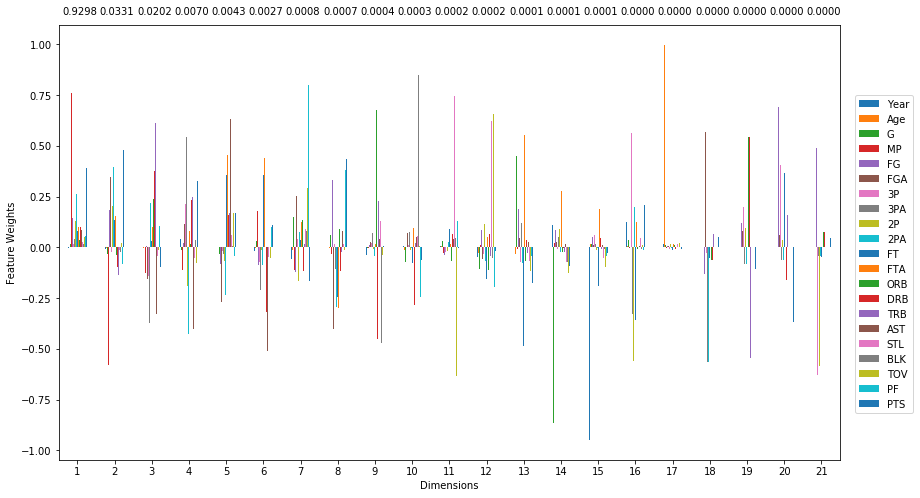

It can be seen that the 1st component explains the 92.98% of the data, and the eight first component explain the  99.79% of the data. That's the reason why these components have been used to train our final model.


### Reflection

Facing this project has been a very challenging and rewarding experience.

It has let me combine different machine learning techniques, reaching a result which, even it is not optimal, motivates me to keep on improving the project in the near future.

Choosing a _not conventional_ project has been the most difficult part of this project. I think I have risked a lot when I decided not to select a more frequently used topic as image classification or time series prediction. Joining all the techniques together to produce consistent results has also involved significant effort.

As a brief summary, I have followed the next steps to complete this project:
- Navigate through different datasets at [Kaggle](http://kaggle.com/) until finding the [NBA players stats dataset](https://www.kaggle.com/drgilermo/nba-players-stats/data) that I have used in this project. I am a formar basketball player (not a professional but neither a bad player) so this subject was very attractive to me.
- Manually inspect the data to have a better understanding of the dataset and performing some preprocess of it, such as removing features that could be easily calculated from others and removing records without all the features fulfilled.
- Once loaded the dataset into pandas, the dataset stats showed that the classes are balanced. That characteristic of our dataset has let me use the accuracy of the predictions to evaluate the performance of this project solution.
- The labels to predict has been one-hot encoded from character to binary vectors. This has been done to facilitate its treatment.
- A basic neural network has been trained before performing any additional preprocessing of the dataset. A 21% accuracy has been obtained by this model. This accuracy is very similar to the one which would have obtained a model with randomly selects the player position. This is a good starting point, to evaluate how our proposed solution (and even the benchmark model) might improve this result once the following techniques are applied.
- Outliers has been removed from the dataset. The Q1 percentile has been set to 10% and the Q3 to 90%. Different values were tried, from {Q1=25%, Q3=75} to our chosen parameters {Q1=10%, Q3=90%}
- Principal component analysis has been performed to reduce the number of features, and therefore trying to avoid the curse of dimensionality effects. After analyzing the PCA results, it was decided to use eight first components, because the explain 99.79% of the data.
- Once reduced the number of features from 22 to 8, our target classifier algorithm, a decission tree algorithm, has been tuned by cross-validated grid-search over a parameter grid. ShuffleSplit cross-validation technique has been used to train the model. The model performance has been validated against the testing set. The resulting model has obtained a 53.25% accuracy, which is significantly better than our initial benchmark.
- As a bonus, the original benchmark model has been retrained and tested this time with the same dataset that the decision tree classifier (the one without outliers and with a reduced number of features). Its accuracy has  increased from 21% to 47.38%.
- Finally, and with the intention to prove that better results can be achieved from this project without too much effort, a slightly improved version of the benchmark model has been trained, obtaining a 60.9% accuracy. The only modifications performed in this new model has been the addition of a couple of Droupt layers and to increase the number of units in the dense layers.

I must confess that I am pleased with having been able to preprocess the dataset, removing its outliers, reducing its dimensionality, optimizing the parameters of an out of the box model and improving by three times the benchmark model accuracy.

### Improvement

I think it is fair to conclude that there is still some room to improve the solution to the proposed problem.

I would focus the efforts in two different aspects:

- Firstly, I would try to add some more preprocessing to the dataset, probably by scaling the feature using some non-linear method such as applying the natural logarithm. If that were not be good enough, I would consider using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness.
- In addition to that, a custom model based on a more complex neural network might be used to improve the results accuracy.


### Acknowledgements

I would like to thank the Udacity mentors and the students' community for their excellent work.

It is also worth mentioning the quality of this course content. It goes from the most basics topics to some state-of-the-art solutions in an easy to follow pace.

Finally, I would also love to specially thank my wife, for her patience and support during the endless hours it has taken to me to complete this Nanodegree.